<a href="https://colab.research.google.com/github/abhiraj-sac/ML-DATA-OPERATIONS/blob/main/placementpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

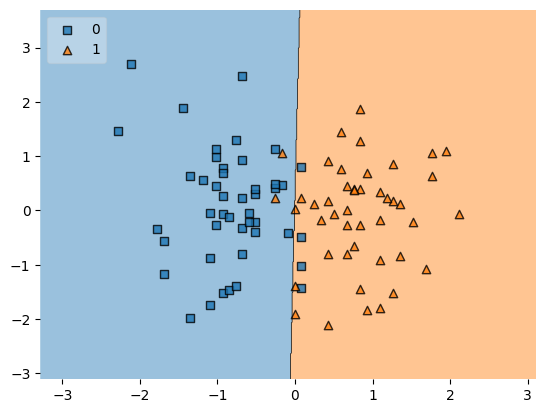

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
file=pd.read_csv('placement.csv')
df=file.iloc[:,1:]
df.head()
# pt.scatter(df['cgpa'],df['iq'],c=df['placement'])
x =df.iloc[:,0:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
# x_train
x_test= scaler.transform(x_test)
# x_test
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_preds =clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)


In [ ]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get('https://www.ambitionbox.com/list-of-companies?page=1',headers=headers).text
soup = BeautifulSoup(webpage,'lxml')
review=[]
name=[]
rating=[]
company = soup.find_all('div',class_='companyCardWrapper__primaryInformation')
for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
    # print(i.find_all('span',class_='companyCardWrapper__ActionCount'))

<ipython-input-6-347eb5413824>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (titanic.groupby('Pclass').mean()['Survived']*100).plot(kind="bar")


<Axes: xlabel='Pclass'>

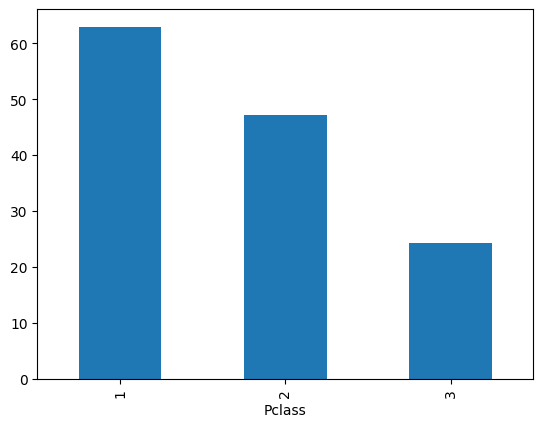

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
titanic = pd.read_csv('titanic.csv')
# FINDING THE MISSING VALUES
# df.isnull().sum()
# df.duplicated().sum()
# COLLRELATION BETWEEN COLUMNS
# df.corr()['Survived']
# sb.countplot(df['Survived'])
(titanic.groupby('Pclass').mean()['Survived']*100).plot(kind="bar")